In [13]:
from pathlib import Path
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('..')

import training

In [6]:
df_all = pd.read_csv('../reports/architecture_investigation/results.csv')

In [10]:
df_all

,direction,size,depth,property,num,epoch,ensemble,smape,mase*
0,bi,128,2,batchnorm,0.0,1.0,False,13.196321,2.667173
1,bi,128,2,batchnorm,0.0,1.0,True,13.196321,2.667173
2,bi,128,2,batchnorm,0.0,2.0,False,13.185542,2.682905
3,bi,128,2,batchnorm,0.0,2.0,True,13.119163,2.659012
4,bi,128,2,batchnorm,0.0,3.0,False,13.128982,2.677859
...,...,...,...,...,...,...,...,...,...
1083,bi,256,2,small,NaN,11.0,True,13.302244,2.709997
1084,bi,256,2,small,NaN,12.0,True,13.318609,2.713046
1085,bi,256,2,small,NaN,13.0,True,13.300983,2.710383
1086,bi,256,2,small,NaN,14.0,True,13.234534,2.698963


In [8]:
def get_experiment(size, depth, prop):
    return df_all[(df_all['size'] == size) & (df_all['depth'] == depth) & (df_all['property'] == prop)]

def plot_experiment(experiment, ax=None, title=None):
    if not ax:
        ax = plt.subplot(111)
    for n in range(4):
        tmp = experiment[experiment['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, 16), base['smape'], c='0.5', alpha=0.5)
        ens = tmp[tmp['ensemble']].dropna()
        ax.plot(range(1, 16), ens['smape'], c='C0', alpha=0.5)
        ax.scatter([15], list(experiment[experiment['epoch'].isna()]['smape']), c='C1', marker='x')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(title)

In [11]:
df_all['property'].unique()

array(['batchnorm', 'dropout', 'layernorm', 'small'], dtype=object)

In [14]:
twolayer_comb_dict = {'size': [128, 256],
                      'depth': [2],
                      'property': ['batchnorm', 'dropout', 'layernorm', 'small']}

combs = list(training.make_runs(twolayer_comb_dict))

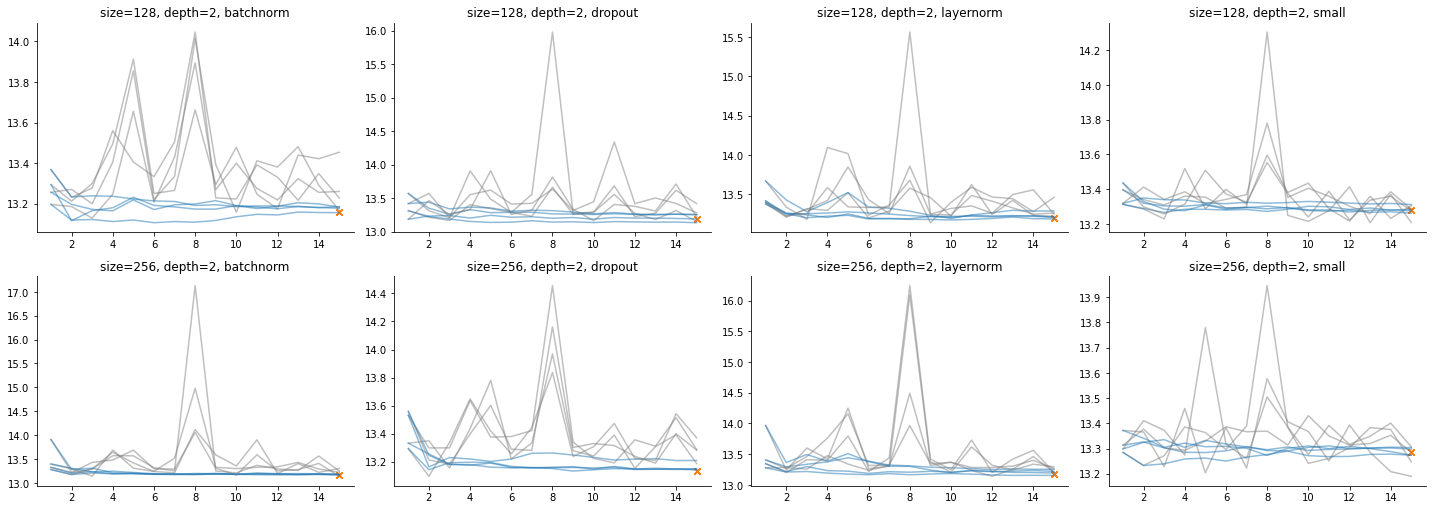

In [19]:
plt.figure(figsize=(20, 14))

for i in range(len(combs)):
    ax = plt.subplot(4, 4, i+1)
    size = combs[i]['size']
    depth = combs[i]['depth']
    prop = combs[i]['property']
    ex = get_experiment(size, depth, prop)
    title = 'size={}, depth={}, {}'.format(size, depth, prop)
    plot_experiment(ex, ax=ax, title=title)
    
plt.tight_layout()